In [1]:
### 훈련데이터와 테스트 데이터 분리하기
# - 수집한 데이터 : 데이터세트하고 칭합니다.
# - 훈련에 사용되는 데이터 : 훈련데이터세트
# - 예측에 사용되는 데이터 : 테스트데이터세트

### 훈련데이터와 테스트데이터로 분리하는 방법
# - 훈련데이터와 테스트데이터를 따로 준비
# - 데이터세트를 특정 비율 또는 갯수로 나누어서 준비..

In [5]:
### [문제]
# 도미와 빙어 데이터세트를 이용하여
# - 각각에 대한 정답데이터 생성(앞에서 했었죠!~)
# - 하나의 2차원 데이터 생성..이것도...

# - 훈련데이터와 테스트데이터 생성하기
# - 훈련데이터 변수 : train_input, train_target
# - 테스트데이터 변수 : test_input, test_target

# 훈련데이터 35개, 테스트데이터 14개로 분리하여
#  (훈련/테스트 분리하는 함수는 사용하지 않습니다.)
# - 객체생성 > 훈련데이터 학습 > 정확도 평가하기..

# score 내부 실행 순서
# predict() 예측 수행
# 정확도 계산 값 반환 
#  - 정확도 = 정답갯수 / 전체갯수

In [9]:
from sklearn.neighbors import KNeighborsClassifier
### 데이터 가지고 오기
# - 도미 데이터.
# - 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# - 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

### 빙어 데이터 가지고 오기
# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 
                12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 
                12.2, 13.4, 12.2, 19.7, 19.9]

### (해석)
# 파랑색 : 도미, 주황색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.


### 데이터 합치기
# 도미와 빙어의 길이는 길이끼리, 무게는 무게끼리 합쳐서 
# 하나의 데이터셋 만들기...

# 도미와 빙어의 길이 데이터 합치기
length = bream_length + smelt_length

# 도미와 빙어의 무게 데이터 합치기
weight = bream_weight + smelt_weight

### 길이와 무게를 하나의 데이터세트로 만들기
# - 사이킷런 라이브러리는 2차원 데이터세트를 사용해야 합니다.
# [[길이, 무게], [길이, 무게], [], .....]

# 변수명 : fish_data

### 리스트 내포 프로그램 : list compre hension 이라고 합니다.
# zip() : 각각의 리스트 안에서 각 인덱스의 쌍을 반환해 줍니다.
# 반복은 zip() 함수가 반환해 주는 갯수만큼 반복 수행...
fish_data = [[leng, wei] for leng, wei in zip(length, weight)]

### 정답 데이터세트 만들기 (종속변수 y)
# - 정답 변수는 1차원 리스트로 별도로 만들어야 함
# - 정답 변수의 갯수는 독립변수의 갯수와 동일해야 합니다.
# - 도미 : 1로, 빙어 : 0으로
### 정답변수 생성하기
# 변수명 : fish_target
# 형태 : 1차원
# 예시 : [1, 1, 1, ....0, 0, 0]
fish_target = [1] * 35 + [0] * 14

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [11]:
# - 훈련데이터와 테스트데이터 생성하기
# - 훈련데이터 변수 : train_input, train_target
# - 테스트데이터 변수 : test_input, test_target

# fit(train_input, train_target)
train_input  = fish_data[ : 35]
train_target = fish_target[ : 35]

# score(test_input, test_target)
test_input   = fish_data[35 : ]
test_target  = fish_target[35 : ]

kn.fit(train_input, train_target)

kn.score(test_input, test_target)
## score() 함수가 실행되는 순서
# 1. predict(test_input)함수 호출 : 예측 수행 (예측정답 갯수 반환)
# 2. 정확도 = 예측정답갯수 / test_target의 전체갯수
# 3. 정확도 반환(return)

0.0

### <샘플링 편향>
##### - 특정 데이터가 몰려있는 부분으로만 훈련이 이루어진 경우
##### - 샘플링 편향을 해결하기 위해서는 훈련 및 테스트 데이터 생성 시
#####  위 아래 데이터들이 잘 섞일 수 있도록 해주어야 합니다.

In [20]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
#print(input_arr)

# 넘파이 배열에서는 차원 확인이 가능 
print(target_arr.shape)

(49,)


In [21]:
### 넘파이 shuffle()함수를 이용해서 배열(리스트) 데이터 섞기...

np.random.seed(42)
# 0~48까지의 순차적인 번호 생성하기
index = np.arange(49)
print("(섞기 전)index = ", index)
print("---------------------")

# 0~48까지의 순차적 번호를 섞기..
# 아직..데이터는 그래도..
np.random.shuffle(index)
print("(섞은 후)index = ", index)

(섞기 전)index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
---------------------
(섞은 후)index =  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [23]:
## 훈련데이터 생성하기
train_input  = input_arr[index[ : 35]]
train_target = target_arr[index[ : 35]]

print(train_input)
print("-------------")
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
-------------
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [24]:
## 테스트 데이터 생성하기
test_input = input_arr[index[35 : ]]
test_target = target_arr[index[35 : ]]

print(test_input)
print("---------------")
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
---------------
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


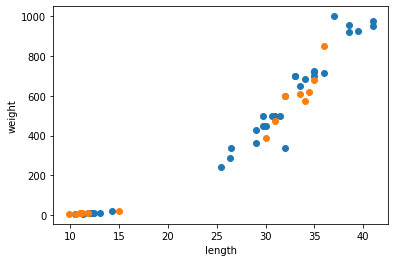

In [27]:
## 도미와 빙어 모두 산점도로 표현하기

### 데이터의 특징간의 분포 확인하기...
# - 선형관계인지 비선형관계인지 확인하기
import matplotlib.pyplot as plt

# 도미 산점도로 표현하기 (scatter(x, y))
plt.scatter(train_input[:, 0], train_input[:, 1])

# 빙어 산점도로 표현하기 (scatter(x, y))
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [28]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [29]:
kn.score(test_input, test_target)

1.0

In [30]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [31]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])